In [1]:
### import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from utils import seir, modified_seir

# Time-Series Plots

Here we generate time-series plots using a specific $R_{0,V}$ value and vaccine efficacy, to model and compare the population dynamics of the two modes of vaccine failure - Leaky and All-or-Nothing. The following 9 regimes governed by the timing and maximum coverage of vaccination were investigated:
- Pre-transmission Vaccination, Coverage Below $f^*_V$ 
- Pre-transmission Vaccination, Coverage Slightly Above $f^*_V$
- Pre-transmission Vaccination, Coverage Above $f^*_V$
- 10 Days Post-transmission Vaccination, Coverage Below $f^*_V$
- 10 Days Post-transmission Vaccination, Coverage Slightly Above $f^*_V$
- 10 Days Post-transmission Vaccination, Coverage Above $f^*_V$
- 30 Days Post-transmission Vaccination, Coverage Below $f^*_V$
- 30 Days Post-transmission Vaccination, Coverage Slightly Above $f^*_V$
- 30 Days Post-transmission Vaccination, Coverage Above $f^*_V$

Recall that $f^*_V$ represents the critical vaccination threshold and is defined as: 

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0}) $$

for instantaneous vaccination before the epidemic starts, and 

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0(1 - f_R)})$$

for instantaneous vaccination after the epidemic starts. 

Based on the contour plot and surface plot, let $R_{0,V} = 2.5$ and $\epsilon_L = 0.6$ (Leaky) or $\epsilon_A = 0.6$ (All-or-Nothing). The simulation was run for 200 days with the following parameter values and initial conditions: $\beta = 2.5/4$, $\gamma = 1/4$, $\sigma=1/4$, $S(0) = 0.98$ $E(0) = 0.01$, $I(0) = 0.01$, $R(0) = 0$.

In [4]:
# set common parameters
sigma = 1/4; gamma = 1/4; R0 = 2.5; beta = R0 * gamma; f = 0
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0; y0 = s0, e0, i0, r0
t = np.arange(0, 200)

# no vaccination
sim = odeint(seir, y0, t, args=(beta, sigma, gamma))
s, e, i, r = sim.T

## Pre-transmission Vaccination, Coverage Below $V_c$

In [13]:
### run model 
# set varying parameters
vc = (1 - s0/R0) / 0.6; vmax = vc * 0.8
s0_vax = 0.98-vmax; e0_vax = 0.01; i0_vax = 0.01

# leaky
epsL = 0.6; epsA = 1; 
v_es0_leaky = 0; v_rs0_leaky = vmax; y0_vax_leaky = s0_vax, v_es0_leaky, v_rs0_leaky, e0_vax, i0_vax, r0
sim_leaky = odeint(modified_seir, y0_vax_leaky, t, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s_leaky, v_es_leaky, v_rs_leaky, e_leaky, i_leaky, r_leaky_pre_below = sim_leaky.T
vtot_leaky = v_es_leaky + v_rs_leaky

# all-or-nothing
epsL = 1; epsA = 0.6; 
v_es0_aon = vmax*(1-epsA); v_rs0_aon = vmax*epsA; y0_vax_aon = s0_vax, v_es0_aon, v_rs0_aon, e0_vax, i0_vax, r0
sim_aon = odeint(modified_seir, y0_vax_aon, t, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s_aon, v_es_aon, v_rs_aon, e_aon, i_aon, r_aon_pre_below = sim_aon.T
vtot_aon = v_es_aon + v_rs_aon

#plt.plot(t, r, 'g', alpha=0.5, lw=2)
#plt.plot(t, r_leaky_pre_below, 'g--', alpha=0.5, lw=2)
#plt.plot(t, r_aon_pre_below, 'g:', alpha=0.5, lw=2)

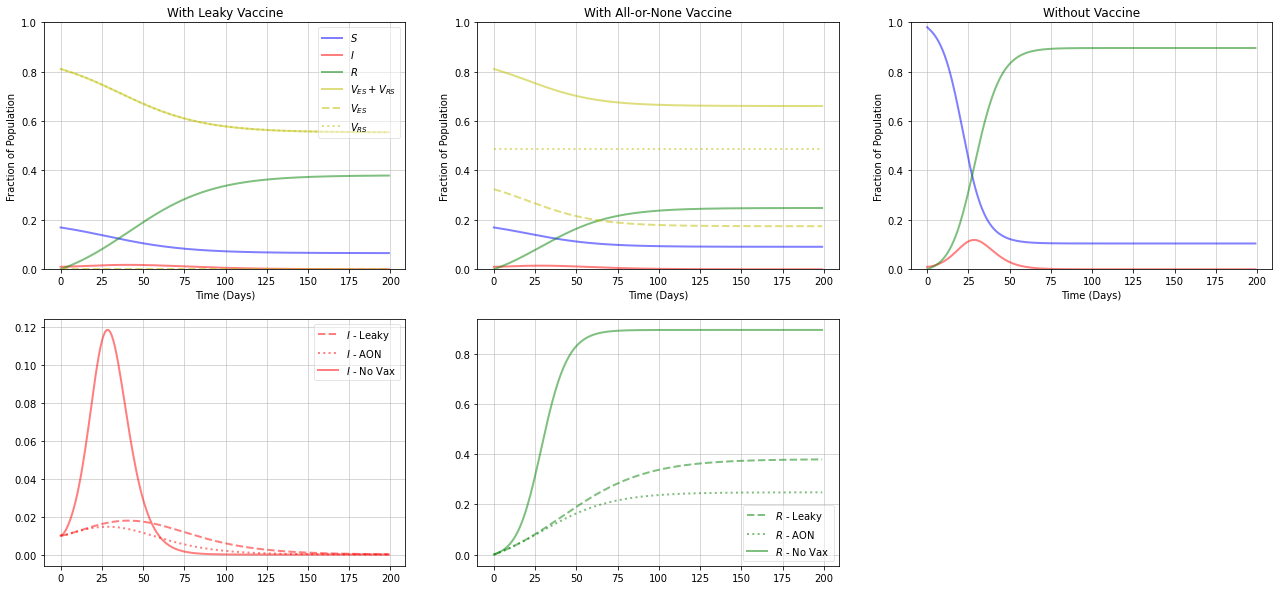

In [14]:
### plot figure
fig = plt.figure(facecolor='w', figsize=(22,10))

ax1 = fig.add_subplot(231, axisbelow=True)
ax1.plot(t, s_leaky, 'b', alpha=0.5, lw=2, label='$S$')
ax1.plot(t, i_leaky, 'r', alpha=0.5, lw=2, label='$I$')
ax1.plot(t, r_leaky_pre_below, 'g', alpha=0.5, lw=2, label='$R$')
ax1.plot(t, vtot_leaky, 'y', alpha=0.5, lw=2, label='$V_{ES} + V_{RS}$')
ax1.plot(t, v_es_leaky, 'y--', alpha=0.5, lw=2, label='$V_{ES}$')
ax1.plot(t, v_rs_leaky, 'y:', alpha=0.5, lw=2, label='$V_{RS}$')
ax1.set_title("With Leaky Vaccine")
ax1.set_ylim(0, 1)
ax1.set_ylabel("Fraction of Population")
ax1.set_xlabel('Time (Days)')
ax1.grid(linewidth=0.5)
legend = ax1.legend(loc='upper right'); legend.get_frame().set_alpha(0.5)

ax2 = fig.add_subplot(232, axisbelow=True)
ax2.plot(t, s_aon, 'b', alpha=0.5, lw=2)
ax2.plot(t, i_aon, 'r', alpha=0.5, lw=2)
ax2.plot(t, r_aon_pre_below, 'g', alpha=0.5, lw=2)
ax2.plot(t, vtot_aon, 'y', alpha=0.5, lw=2)
ax2.plot(t, v_es_aon, 'y--', alpha=0.5, lw=2)
ax2.plot(t, v_rs_aon, 'y:', alpha=0.5, lw=2)
ax2.set_title("With All-or-None Vaccine")
ax2.set_ylim(0, 1)
ax2.set_ylabel("Fraction of Population")
ax2.set_xlabel('Time (Days)')
ax2.grid(linewidth=0.5)

ax3 = fig.add_subplot(233, axisbelow=True)
ax3.plot(t, s, 'b', alpha=0.5, lw=2)
ax3.plot(t, i, 'r', alpha=0.5, lw=2)
ax3.plot(t, r, 'g', alpha=0.5, lw=2)
ax3.set_title('Without Vaccine')
ax3.set_ylabel('Fraction of Population')
ax3.set_xlabel('Time (Days)')
ax3.set_ylim(0, 1)
ax3.grid(linewidth=0.5)

ax4 = fig.add_subplot(234, axisbelow=True)
ax4.plot(t, i_leaky, 'r--', alpha=0.5, lw=2, label='$I$ - Leaky')
ax4.plot(t, i_aon, 'r:', alpha=0.5, lw=2, label= '$I$ - AON')
ax4.plot(t, i, 'r', alpha=0.5, lw=2, label='$I$ - No Vax')
ax4.grid(linewidth=0.5)
legend = ax4.legend(); legend.get_frame().set_alpha(0.5)

ax5 = fig.add_subplot(235, axisbelow=True)
ax5.plot(t, r_leaky_pre_below, 'g--', alpha=0.5, lw=2, label='$R$ - Leaky')
ax5.plot(t, r_aon_pre_below, 'g:', alpha=0.5, lw=2, label='$R$ - AON')
ax5.plot(t, r, 'g', alpha=0.5, lw=2, label='$R$ - No Vax')
ax5.grid(linewidth=0.5)
legend = ax5.legend(); legend.get_frame().set_alpha(0.5)

#plt.savefig('seir_example', bbox_inches='tight')

## Pre-transmission Vaccination, Coverage Slightly Above $V_c$

In [15]:
### run model 
# set varying parameters
vc = (1 - s0/R0) / 0.6; vmax = 1 - ((1 - vc) * 0.8)
s0_vax = 0.98-vmax; e0_vax = 0.01; i0_vax = 0.01

# leaky
epsL = 0.6; epsA = 1; 
v_es0_leaky = 0; v_rs0_leaky = vmax; y0_vax_leaky = s0_vax, v_es0_leaky, v_rs0_leaky, e0_vax, i0_vax, r0
sim_leaky = odeint(modified_seir, y0_vax_leaky, t, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s_leaky, v_es_leaky, v_rs_leaky, e_leaky, i_leaky, r_leaky_pre_slabove = sim_leaky.T
vtot_leaky = v_es_leaky + v_rs_leaky

# all-or-nothing
epsL = 1; epsA = 0.6; 
v_es0_aon = vmax*(1-epsA); v_rs0_aon = vmax*epsA; y0_vax_aon = s0_vax, v_es0_aon, v_rs0_aon, e0_vax, i0_vax, r0
sim_aon = odeint(modified_seir, y0_vax_aon, t, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s_aon, v_es_aon, v_rs_aon, e_aon, i_aon, r_aon_pre_slabove = sim_aon.T
vtot_aon = v_es_aon + v_rs_aon

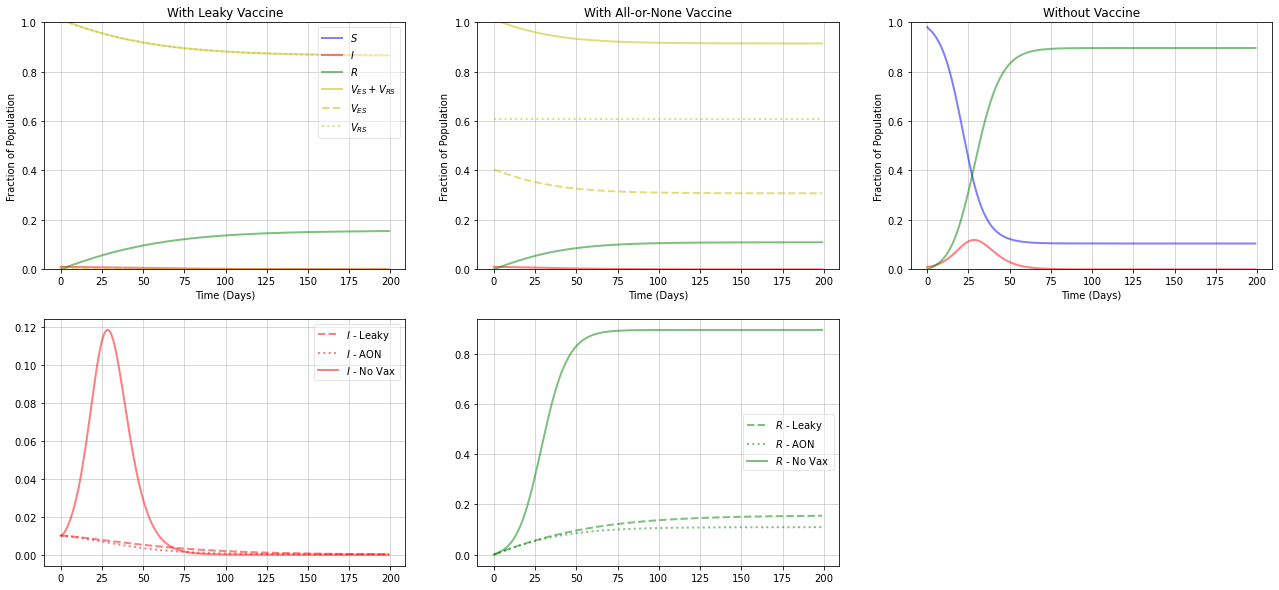

In [16]:
### plot figure
fig = plt.figure(facecolor='w', figsize=(22,10))

ax1 = fig.add_subplot(231, axisbelow=True)
ax1.plot(t, s_leaky, 'b', alpha=0.5, lw=2, label='$S$')
ax1.plot(t, i_leaky, 'r', alpha=0.5, lw=2, label='$I$')
ax1.plot(t, r_leaky_pre_slabove, 'g', alpha=0.5, lw=2, label='$R$')
ax1.plot(t, vtot_leaky, 'y', alpha=0.5, lw=2, label='$V_{ES} + V_{RS}$')
ax1.plot(t, v_es_leaky, 'y--', alpha=0.5, lw=2, label='$V_{ES}$')
ax1.plot(t, v_rs_leaky, 'y:', alpha=0.5, lw=2, label='$V_{RS}$')
ax1.set_title("With Leaky Vaccine")
ax1.set_ylim(0, 1)
ax1.set_ylabel("Fraction of Population")
ax1.set_xlabel('Time (Days)')
ax1.grid(linewidth=0.5)
legend = ax1.legend(loc='upper right'); legend.get_frame().set_alpha(0.5)

ax2 = fig.add_subplot(232, axisbelow=True)
ax2.plot(t, s_aon, 'b', alpha=0.5, lw=2)
ax2.plot(t, i_aon, 'r', alpha=0.5, lw=2)
ax2.plot(t, r_aon_pre_slabove, 'g', alpha=0.5, lw=2)
ax2.plot(t, vtot_aon, 'y', alpha=0.5, lw=2)
ax2.plot(t, v_es_aon, 'y--', alpha=0.5, lw=2)
ax2.plot(t, v_rs_aon, 'y:', alpha=0.5, lw=2)
ax2.set_title("With All-or-None Vaccine")
ax2.set_ylim(0, 1)
ax2.set_ylabel("Fraction of Population")
ax2.set_xlabel('Time (Days)')
ax2.grid(linewidth=0.5)

ax3 = fig.add_subplot(233, axisbelow=True)
ax3.plot(t, s, 'b', alpha=0.5, lw=2)
ax3.plot(t, i, 'r', alpha=0.5, lw=2)
ax3.plot(t, r, 'g', alpha=0.5, lw=2)
ax3.set_title('Without Vaccine')
ax3.set_ylabel('Fraction of Population')
ax3.set_xlabel('Time (Days)')
ax3.set_ylim(0, 1)
ax3.grid(linewidth=0.5)

ax4 = fig.add_subplot(234, axisbelow=True)
ax4.plot(t, i_leaky, 'r--', alpha=0.5, lw=2, label='$I$ - Leaky')
ax4.plot(t, i_aon, 'r:', alpha=0.5, lw=2, label= '$I$ - AON')
ax4.plot(t, i, 'r', alpha=0.5, lw=2, label='$I$ - No Vax')
ax4.grid(linewidth=0.5)
legend = ax4.legend(); legend.get_frame().set_alpha(0.5)

ax5 = fig.add_subplot(235, axisbelow=True)
ax5.plot(t, r_leaky_pre_slabove, 'g--', alpha=0.5, lw=2, label='$R$ - Leaky')
ax5.plot(t, r_aon_pre_slabove, 'g:', alpha=0.5, lw=2, label='$R$ - AON')
ax5.plot(t, r, 'g', alpha=0.5, lw=2, label='$R$ - No Vax')
ax5.grid(linewidth=0.5)
legend = ax5.legend(); legend.get_frame().set_alpha(0.5)

#plt.savefig('seir_example', bbox_inches='tight')

## Pre-transmission Vaccination, Above $V_c$

In [17]:
vc = (1 - s0/R0) / 0.6; vmax = 1 - ((1 - vc) * 0.5)
s0_vax = 0.98-vmax; e0_vax = 0.01; i0_vax = 0.01

# leaky
epsL = 0.6; epsA = 1; 
v_es0_leaky = 0; v_rs0_leaky = vmax; y0_vax_leaky = s0_vax, v_es0_leaky, v_rs0_leaky, e0_vax, i0_vax, r0
sim_leaky = odeint(modified_seir, y0_vax_leaky, t, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s_leaky, v_es_leaky, v_rs_leaky, e_leaky, i_leaky, r_leaky_pre_above = sim_leaky.T
vtot_leaky = v_es_leaky + v_rs_leaky

# all-or-nothing
epsL = 1; epsA = 0.6; 
v_es0_aon = vmax*(1-epsA); v_rs0_aon = vmax*epsA; y0_vax_aon = s0_vax, v_es0_aon, v_rs0_aon, e0_vax, i0_vax, r0
sim_aon = odeint(modified_seir, y0_vax_aon, t, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s_aon, v_es_aon, v_rs_aon, e_aon, i_aon, r_aon_pre_above = sim_aon.T
vtot_aon = v_es_aon + v_rs_aon

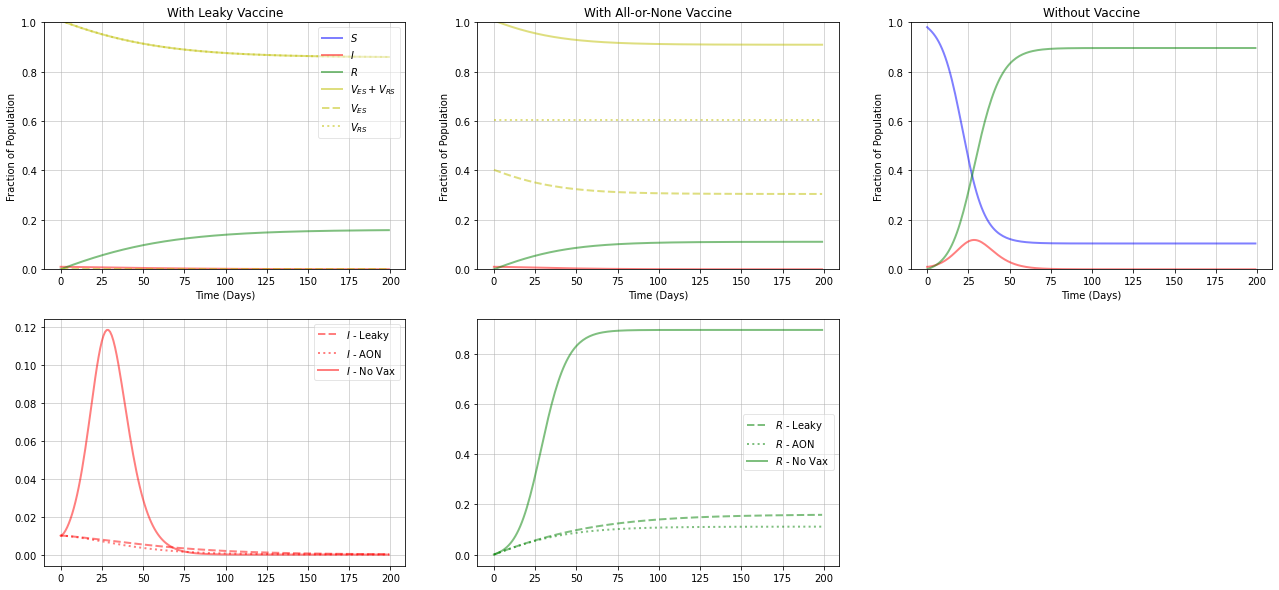

In [18]:
### plot figure
fig = plt.figure(facecolor='w', figsize=(22,10))

ax1 = fig.add_subplot(231, axisbelow=True)
ax1.plot(t, s_leaky, 'b', alpha=0.5, lw=2, label='$S$')
ax1.plot(t, i_leaky, 'r', alpha=0.5, lw=2, label='$I$')
ax1.plot(t, r_leaky_pre_above, 'g', alpha=0.5, lw=2, label='$R$')
ax1.plot(t, vtot_leaky, 'y', alpha=0.5, lw=2, label='$V_{ES} + V_{RS}$')
ax1.plot(t, v_es_leaky, 'y--', alpha=0.5, lw=2, label='$V_{ES}$')
ax1.plot(t, v_rs_leaky, 'y:', alpha=0.5, lw=2, label='$V_{RS}$')
ax1.set_title("With Leaky Vaccine")
ax1.set_ylim(0, 1)
ax1.set_ylabel("Fraction of Population")
ax1.set_xlabel('Time (Days)')
ax1.grid(linewidth=0.5)
legend = ax1.legend(loc='upper right'); legend.get_frame().set_alpha(0.5)

ax2 = fig.add_subplot(232, axisbelow=True)
ax2.plot(t, s_aon, 'b', alpha=0.5, lw=2)
ax2.plot(t, i_aon, 'r', alpha=0.5, lw=2)
ax2.plot(t, r_aon_pre_above, 'g', alpha=0.5, lw=2)
ax2.plot(t, vtot_aon, 'y', alpha=0.5, lw=2)
ax2.plot(t, v_es_aon, 'y--', alpha=0.5, lw=2)
ax2.plot(t, v_rs_aon, 'y:', alpha=0.5, lw=2)
ax2.set_title("With All-or-None Vaccine")
ax2.set_ylim(0, 1)
ax2.set_ylabel("Fraction of Population")
ax2.set_xlabel('Time (Days)')
ax2.grid(linewidth=0.5)

ax3 = fig.add_subplot(233, axisbelow=True)
ax3.plot(t, s, 'b', alpha=0.5, lw=2)
ax3.plot(t, i, 'r', alpha=0.5, lw=2)
ax3.plot(t, r, 'g', alpha=0.5, lw=2)
ax3.set_title('Without Vaccine')
ax3.set_ylabel('Fraction of Population')
ax3.set_xlabel('Time (Days)')
ax3.set_ylim(0, 1)
ax3.grid(linewidth=0.5)

ax4 = fig.add_subplot(234, axisbelow=True)
ax4.plot(t, i_leaky, 'r--', alpha=0.5, lw=2, label='$I$ - Leaky')
ax4.plot(t, i_aon, 'r:', alpha=0.5, lw=2, label= '$I$ - AON')
ax4.plot(t, i, 'r', alpha=0.5, lw=2, label='$I$ - No Vax')
ax4.grid(linewidth=0.5)
legend = ax4.legend(); legend.get_frame().set_alpha(0.5)

ax5 = fig.add_subplot(235, axisbelow=True)
ax5.plot(t, r_leaky_pre_above, 'g--', alpha=0.5, lw=2, label='$R$ - Leaky')
ax5.plot(t, r_aon_pre_above, 'g:', alpha=0.5, lw=2, label='$R$ - AON')
ax5.plot(t, r, 'g', alpha=0.5, lw=2, label='$R$ - No Vax')
ax5.grid(linewidth=0.5)
legend = ax5.legend(); legend.get_frame().set_alpha(0.5)

#plt.savefig('seir_example', bbox_inches='tight')

## 10-Days Post-transmission Vaccination, Below $V_c$

In [22]:
# set initial conditions for vaccination
v_es0 = 0; v_rs0 = 0; D = 200; D_vax = 10
t_bfvax = np.arange(0, D_vax+1); t_aftvax = np.arange(D_vax, D)
sim_vax = odeint(seir, y0, t_bfvax, args=(beta, sigma, gamma))
s0_vax, e0_vax, i0_vax, r0_vax = sim_vax.T


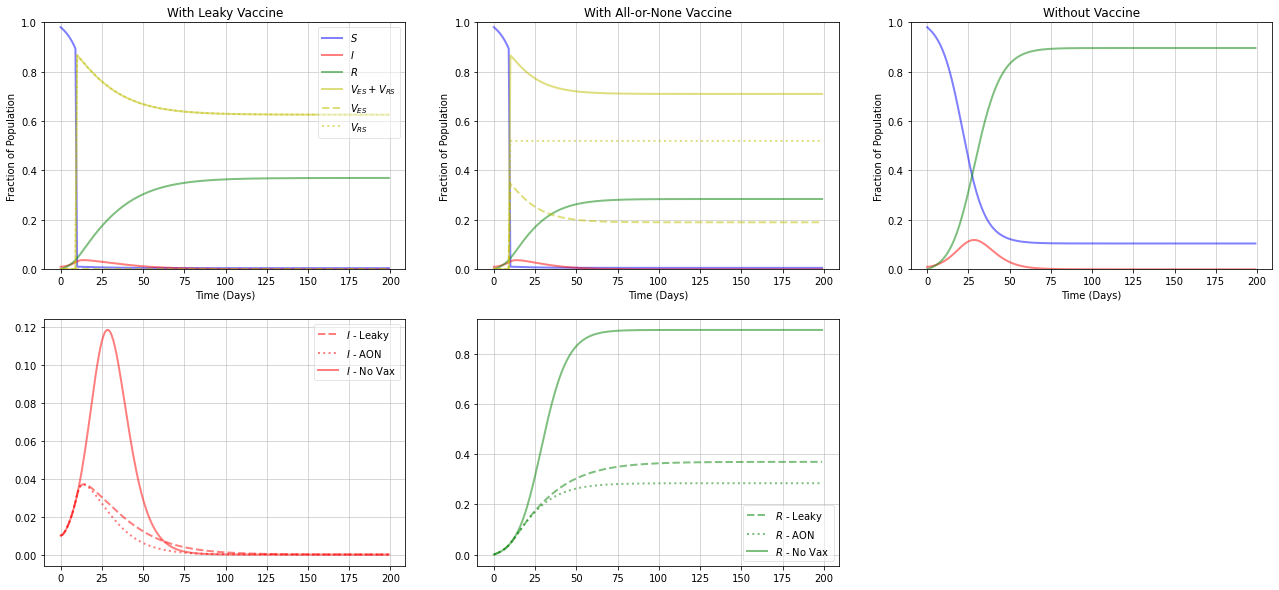

In [23]:
### run model
# set varying parameters
vc = (1 - s0_vax[-1]/R0) / 0.6; vmax = vc * 0.8

# leaky
epsL = 0.6; epsA = 1
v_es0_leaky = 0; v_rs0_leaky = vmax
y0_vax_leaky = s0_vax[-1] - vmax, v_es0_leaky, v_rs0_leaky, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_leaky = odeint(modified_seir, y0_vax_leaky, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_leaky, v_es1_leaky, v_rs1_leaky, e1_leaky, i1_leaky, r1_leaky = sim_leaky.T
vtot1_leaky = v_es1_leaky + v_rs1_leaky

s_leaky = np.concatenate((s0_vax[:-1], s1_leaky), axis=None)
e_leaky = np.concatenate((e0_vax[:-1], e1_leaky), axis=None)
i_leaky = np.concatenate((i0_vax[:-1], i1_leaky), axis=None)
r_leaky_post10_below = np.concatenate((r0_vax[:-1], r1_leaky), axis=None)
vtot_leaky = np.concatenate((np.zeros(D_vax), vtot1_leaky), axis=None)
v_es_leaky = np.concatenate((np.zeros(D_vax), v_es1_leaky), axis=None)
v_rs_leaky = np.concatenate((np.zeros(D_vax), v_rs1_leaky), axis=None)

# aon
epsL = 1; epsA = 0.6
v_es0_aon = vmax*(1-epsA); v_rs0_aon = vmax*epsA
y0_vax_aon = s0_vax[-1] - vmax, v_es0_aon, v_rs0_aon, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_aon = odeint(modified_seir, y0_vax_aon, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_aon, v_es1_aon, v_rs1_aon, e1_aon, i1_aon, r1_aon = sim_aon.T
vtot1_aon = v_es1_aon + v_rs1_aon

s_aon = np.concatenate((s0_vax[:-1], s1_aon), axis=None)
e_aon = np.concatenate((e0_vax[:-1], e1_aon), axis=None)
i_aon = np.concatenate((i0_vax[:-1], i1_aon), axis=None)
r_aon_post10_below = np.concatenate((r0_vax[:-1], r1_aon), axis=None)
vtot_aon = np.concatenate((np.zeros(D_vax), vtot1_aon), axis=None)
v_es_aon = np.concatenate((np.zeros(D_vax), v_es1_aon), axis=None)
v_rs_aon = np.concatenate((np.zeros(D_vax), v_rs1_aon), axis=None)

### plot figure
fig = plt.figure(facecolor='w', figsize=(22,10))

ax1 = fig.add_subplot(231, axisbelow=True)
ax1.plot(t, s_leaky, 'b', alpha=0.5, lw=2, label='$S$')
ax1.plot(t, i_leaky, 'r', alpha=0.5, lw=2, label='$I$')
ax1.plot(t, r_leaky_post10_below, 'g', alpha=0.5, lw=2, label='$R$')
ax1.plot(t, vtot_leaky, 'y', alpha=0.5, lw=2, label='$V_{ES} + V_{RS}$')
ax1.plot(t, v_es_leaky, 'y--', alpha=0.5, lw=2, label='$V_{ES}$')
ax1.plot(t, v_rs_leaky, 'y:', alpha=0.5, lw=2, label='$V_{RS}$')
ax1.set_title("With Leaky Vaccine")
ax1.set_ylim(0, 1)
ax1.set_ylabel("Fraction of Population")
ax1.set_xlabel('Time (Days)')
ax1.grid(linewidth=0.5)
legend = ax1.legend(loc='upper right'); legend.get_frame().set_alpha(0.5)

ax2 = fig.add_subplot(232, axisbelow=True)
ax2.plot(t, s_aon, 'b', alpha=0.5, lw=2)
ax2.plot(t, i_aon, 'r', alpha=0.5, lw=2)
ax2.plot(t, r_aon_post10_below, 'g', alpha=0.5, lw=2)
ax2.plot(t, vtot_aon, 'y', alpha=0.5, lw=2)
ax2.plot(t, v_es_aon, 'y--', alpha=0.5, lw=2)
ax2.plot(t, v_rs_aon, 'y:', alpha=0.5, lw=2)
ax2.set_title("With All-or-None Vaccine")
ax2.set_ylim(0, 1)
ax2.set_ylabel("Fraction of Population")
ax2.set_xlabel('Time (Days)')
ax2.grid(linewidth=0.5)

ax3 = fig.add_subplot(233, axisbelow=True)
ax3.plot(t, s, 'b', alpha=0.5, lw=2)
ax3.plot(t, i, 'r', alpha=0.5, lw=2)
ax3.plot(t, r, 'g', alpha=0.5, lw=2)
ax3.set_title('Without Vaccine')
ax3.set_ylabel('Fraction of Population')
ax3.set_xlabel('Time (Days)')
ax3.set_ylim(0, 1)
ax3.grid(linewidth=0.5)

ax4 = fig.add_subplot(234, axisbelow=True)
ax4.plot(t, i_leaky, 'r--', alpha=0.5, lw=2, label='$I$ - Leaky')
ax4.plot(t, i_aon, 'r:', alpha=0.5, lw=2, label= '$I$ - AON')
ax4.plot(t, i, 'r', alpha=0.5, lw=2, label='$I$ - No Vax')
ax4.grid(linewidth=0.5)
legend = ax4.legend(); legend.get_frame().set_alpha(0.5)

ax5 = fig.add_subplot(235, axisbelow=True)
ax5.plot(t, r_leaky_post10_below, 'g--', alpha=0.5, lw=2, label='$R$ - Leaky')
ax5.plot(t, r_aon_post10_below, 'g:', alpha=0.5, lw=2, label='$R$ - AON')
ax5.plot(t, r, 'g', alpha=0.5, lw=2, label='$R$ - No Vax')
ax5.grid(linewidth=0.5)
legend = ax5.legend(); legend.get_frame().set_alpha(0.5)

#plt.savefig('seir_example', bbox_inches='tight')

## 10 Days Post-transmission Vaccination, Slightly Above $V_c$

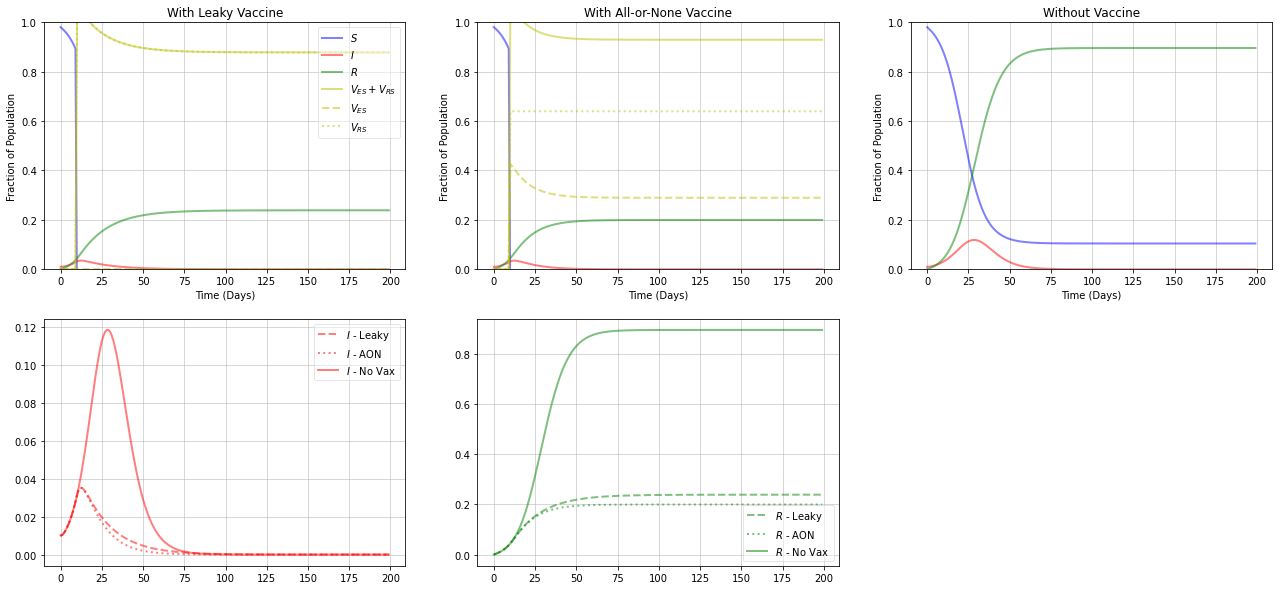

In [24]:
### run model
# set varying parameters
vc = (1 - s0_vax[-1]/R0) / 0.6; vmax = 1 - ((1 - vc) * 0.8)

# leaky
epsL = 0.6; epsA = 1
v_es0_leaky = 0; v_rs0_leaky = vmax
y0_vax_leaky = s0_vax[-1] - vmax, v_es0_leaky, v_rs0_leaky, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_leaky = odeint(modified_seir, y0_vax_leaky, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_leaky, v_es1_leaky, v_rs1_leaky, e1_leaky, i1_leaky, r1_leaky = sim_leaky.T
vtot1_leaky = v_es1_leaky + v_rs1_leaky

s_leaky = np.concatenate((s0_vax[:-1], s1_leaky), axis=None)
e_leaky = np.concatenate((e0_vax[:-1], e1_leaky), axis=None)
i_leaky = np.concatenate((i0_vax[:-1], i1_leaky), axis=None)
r_leaky_post10_slabove = np.concatenate((r0_vax[:-1], r1_leaky), axis=None)
vtot_leaky = np.concatenate((np.zeros(D_vax), vtot1_leaky), axis=None)
v_es_leaky = np.concatenate((np.zeros(D_vax), v_es1_leaky), axis=None)
v_rs_leaky = np.concatenate((np.zeros(D_vax), v_rs1_leaky), axis=None)

# aon
epsL = 1; epsA = 0.6
v_es0_aon = vmax*(1-epsA); v_rs0_aon = vmax*epsA
y0_vax_aon = s0_vax[-1] - vmax, v_es0_aon, v_rs0_aon, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_aon = odeint(modified_seir, y0_vax_aon, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_aon, v_es1_aon, v_rs1_aon, e1_aon, i1_aon, r1_aon = sim_aon.T
vtot1_aon = v_es1_aon + v_rs1_aon

s_aon = np.concatenate((s0_vax[:-1], s1_aon), axis=None)
e_aon = np.concatenate((e0_vax[:-1], e1_aon), axis=None)
i_aon = np.concatenate((i0_vax[:-1], i1_aon), axis=None)
r_aon_post10_slabove = np.concatenate((r0_vax[:-1], r1_aon), axis=None)
vtot_aon = np.concatenate((np.zeros(D_vax), vtot1_aon), axis=None)
v_es_aon = np.concatenate((np.zeros(D_vax), v_es1_aon), axis=None)
v_rs_aon = np.concatenate((np.zeros(D_vax), v_rs1_aon), axis=None)

### plot figure
fig = plt.figure(facecolor='w', figsize=(22,10))

ax1 = fig.add_subplot(231, axisbelow=True)
ax1.plot(t, s_leaky, 'b', alpha=0.5, lw=2, label='$S$')
ax1.plot(t, i_leaky, 'r', alpha=0.5, lw=2, label='$I$')
ax1.plot(t, r_leaky_post10_slabove, 'g', alpha=0.5, lw=2, label='$R$')
ax1.plot(t, vtot_leaky, 'y', alpha=0.5, lw=2, label='$V_{ES} + V_{RS}$')
ax1.plot(t, v_es_leaky, 'y--', alpha=0.5, lw=2, label='$V_{ES}$')
ax1.plot(t, v_rs_leaky, 'y:', alpha=0.5, lw=2, label='$V_{RS}$')
ax1.set_title("With Leaky Vaccine")
ax1.set_ylim(0, 1)
ax1.set_ylabel("Fraction of Population")
ax1.set_xlabel('Time (Days)')
ax1.grid(linewidth=0.5)
legend = ax1.legend(loc='upper right'); legend.get_frame().set_alpha(0.5)

ax2 = fig.add_subplot(232, axisbelow=True)
ax2.plot(t, s_aon, 'b', alpha=0.5, lw=2)
ax2.plot(t, i_aon, 'r', alpha=0.5, lw=2)
ax2.plot(t, r_aon_post10_slabove, 'g', alpha=0.5, lw=2)
ax2.plot(t, vtot_aon, 'y', alpha=0.5, lw=2)
ax2.plot(t, v_es_aon, 'y--', alpha=0.5, lw=2)
ax2.plot(t, v_rs_aon, 'y:', alpha=0.5, lw=2)
ax2.set_title("With All-or-None Vaccine")
ax2.set_ylim(0, 1)
ax2.set_ylabel("Fraction of Population")
ax2.set_xlabel('Time (Days)')
ax2.grid(linewidth=0.5)

ax3 = fig.add_subplot(233, axisbelow=True)
ax3.plot(t, s, 'b', alpha=0.5, lw=2)
ax3.plot(t, i, 'r', alpha=0.5, lw=2)
ax3.plot(t, r, 'g', alpha=0.5, lw=2)
ax3.set_title('Without Vaccine')
ax3.set_ylabel('Fraction of Population')
ax3.set_xlabel('Time (Days)')
ax3.set_ylim(0, 1)
ax3.grid(linewidth=0.5)

ax4 = fig.add_subplot(234, axisbelow=True)
ax4.plot(t, i_leaky, 'r--', alpha=0.5, lw=2, label='$I$ - Leaky')
ax4.plot(t, i_aon, 'r:', alpha=0.5, lw=2, label= '$I$ - AON')
ax4.plot(t, i, 'r', alpha=0.5, lw=2, label='$I$ - No Vax')
ax4.grid(linewidth=0.5)
legend = ax4.legend(); legend.get_frame().set_alpha(0.5)

ax5 = fig.add_subplot(235, axisbelow=True)
ax5.plot(t, r_leaky_post10_slabove, 'g--', alpha=0.5, lw=2, label='$R$ - Leaky')
ax5.plot(t, r_aon_post10_slabove, 'g:', alpha=0.5, lw=2, label='$R$ - AON')
ax5.plot(t, r, 'g', alpha=0.5, lw=2, label='$R$ - No Vax')
ax5.grid(linewidth=0.5)
legend = ax5.legend(); legend.get_frame().set_alpha(0.5)

#plt.savefig('seir_example', bbox_inches='tight')

## 10 Days Post-transmission Vaccination, Above $V_c$

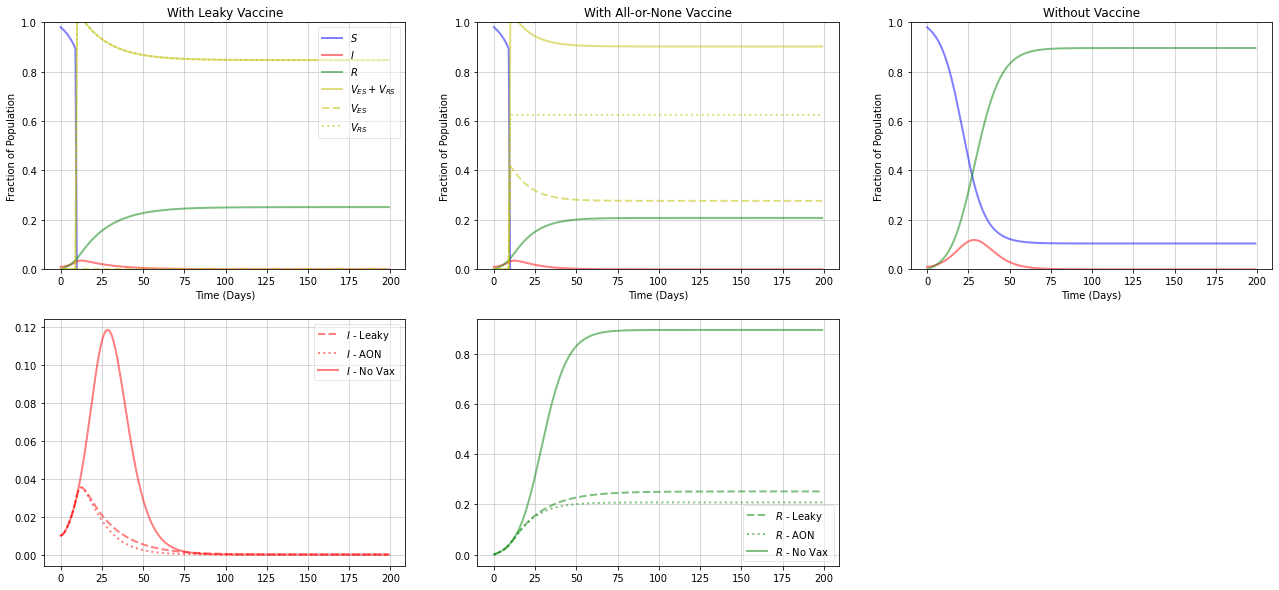

In [25]:
### run model
# set varying parameters
vc = (1 - s0_vax[-1]/R0) / 0.6; vmax = 1 - ((1 - vc) * 0.5)

# leaky
epsL = 0.6; epsA = 1
v_es0_leaky = 0; v_rs0_leaky = vmax
y0_vax_leaky = s0_vax[-1] - vmax, v_es0_leaky, v_rs0_leaky, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_leaky = odeint(modified_seir, y0_vax_leaky, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_leaky, v_es1_leaky, v_rs1_leaky, e1_leaky, i1_leaky, r1_leaky = sim_leaky.T
vtot1_leaky = v_es1_leaky + v_rs1_leaky

s_leaky = np.concatenate((s0_vax[:-1], s1_leaky), axis=None)
e_leaky = np.concatenate((e0_vax[:-1], e1_leaky), axis=None)
i_leaky = np.concatenate((i0_vax[:-1], i1_leaky), axis=None)
r_leaky_post10_above = np.concatenate((r0_vax[:-1], r1_leaky), axis=None)
vtot_leaky = np.concatenate((np.zeros(D_vax), vtot1_leaky), axis=None)
v_es_leaky = np.concatenate((np.zeros(D_vax), v_es1_leaky), axis=None)
v_rs_leaky = np.concatenate((np.zeros(D_vax), v_rs1_leaky), axis=None)

# aon
epsL = 1; epsA = 0.6
v_es0_aon = vmax*(1-epsA); v_rs0_aon = vmax*epsA
y0_vax_aon = s0_vax[-1] - vmax, v_es0_aon, v_rs0_aon, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_aon = odeint(modified_seir, y0_vax_aon, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_aon, v_es1_aon, v_rs1_aon, e1_aon, i1_aon, r1_aon = sim_aon.T
vtot1_aon = v_es1_aon + v_rs1_aon

s_aon = np.concatenate((s0_vax[:-1], s1_aon), axis=None)
e_aon = np.concatenate((e0_vax[:-1], e1_aon), axis=None)
i_aon = np.concatenate((i0_vax[:-1], i1_aon), axis=None)
r_aon_post10_above = np.concatenate((r0_vax[:-1], r1_aon), axis=None)
vtot_aon = np.concatenate((np.zeros(D_vax), vtot1_aon), axis=None)
v_es_aon = np.concatenate((np.zeros(D_vax), v_es1_aon), axis=None)
v_rs_aon = np.concatenate((np.zeros(D_vax), v_rs1_aon), axis=None)

### plot figure
fig = plt.figure(facecolor='w', figsize=(22,10))

ax1 = fig.add_subplot(231, axisbelow=True)
ax1.plot(t, s_leaky, 'b', alpha=0.5, lw=2, label='$S$')
ax1.plot(t, i_leaky, 'r', alpha=0.5, lw=2, label='$I$')
ax1.plot(t, r_leaky_post10_above, 'g', alpha=0.5, lw=2, label='$R$')
ax1.plot(t, vtot_leaky, 'y', alpha=0.5, lw=2, label='$V_{ES} + V_{RS}$')
ax1.plot(t, v_es_leaky, 'y--', alpha=0.5, lw=2, label='$V_{ES}$')
ax1.plot(t, v_rs_leaky, 'y:', alpha=0.5, lw=2, label='$V_{RS}$')
ax1.set_title("With Leaky Vaccine")
ax1.set_ylim(0, 1)
ax1.set_ylabel("Fraction of Population")
ax1.set_xlabel('Time (Days)')
ax1.grid(linewidth=0.5)
legend = ax1.legend(loc='upper right'); legend.get_frame().set_alpha(0.5)

ax2 = fig.add_subplot(232, axisbelow=True)
ax2.plot(t, s_aon, 'b', alpha=0.5, lw=2)
ax2.plot(t, i_aon, 'r', alpha=0.5, lw=2)
ax2.plot(t, r_aon_post10_above, 'g', alpha=0.5, lw=2)
ax2.plot(t, vtot_aon, 'y', alpha=0.5, lw=2)
ax2.plot(t, v_es_aon, 'y--', alpha=0.5, lw=2)
ax2.plot(t, v_rs_aon, 'y:', alpha=0.5, lw=2)
ax2.set_title("With All-or-None Vaccine")
ax2.set_ylim(0, 1)
ax2.set_ylabel("Fraction of Population")
ax2.set_xlabel('Time (Days)')
ax2.grid(linewidth=0.5)

ax3 = fig.add_subplot(233, axisbelow=True)
ax3.plot(t, s, 'b', alpha=0.5, lw=2)
ax3.plot(t, i, 'r', alpha=0.5, lw=2)
ax3.plot(t, r, 'g', alpha=0.5, lw=2)
ax3.set_title('Without Vaccine')
ax3.set_ylabel('Fraction of Population')
ax3.set_xlabel('Time (Days)')
ax3.set_ylim(0, 1)
ax3.grid(linewidth=0.5)

ax4 = fig.add_subplot(234, axisbelow=True)
ax4.plot(t, i_leaky, 'r--', alpha=0.5, lw=2, label='$I$ - Leaky')
ax4.plot(t, i_aon, 'r:', alpha=0.5, lw=2, label= '$I$ - AON')
ax4.plot(t, i, 'r', alpha=0.5, lw=2, label='$I$ - No Vax')
ax4.grid(linewidth=0.5)
legend = ax4.legend(); legend.get_frame().set_alpha(0.5)

ax5 = fig.add_subplot(235, axisbelow=True)
ax5.plot(t, r_leaky_post10_above, 'g--', alpha=0.5, lw=2, label='$R$ - Leaky')
ax5.plot(t, r_aon_post10_above, 'g:', alpha=0.5, lw=2, label='$R$ - AON')
ax5.plot(t, r, 'g', alpha=0.5, lw=2, label='$R$ - No Vax')
ax5.grid(linewidth=0.5)
legend = ax5.legend(); legend.get_frame().set_alpha(0.5)

#plt.savefig('seir_example', bbox_inches='tight')

## 30 Days Post-transmission Vaccination, Below $V_c$

In [26]:
# set initial conditions for vaccination
v_es0 = 0; v_rs0 = 0; D = 200; D_vax = 30
t_bfvax = np.arange(0, D_vax+1); t_aftvax = np.arange(D_vax, D)
sim_vax = odeint(seir, y0, t_bfvax, args=(beta, sigma, gamma))
s0_vax, e0_vax, i0_vax, r0_vax = sim_vax.T

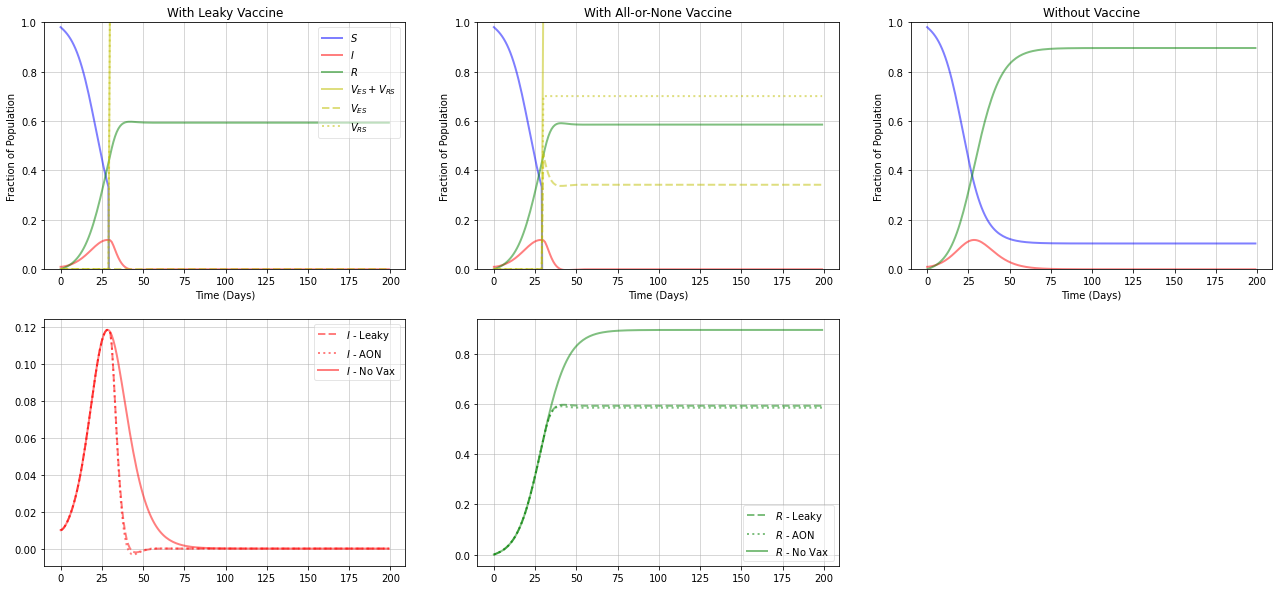

In [27]:
### run model
# set varying parameters
vc = (1 - s0_vax[-1]/R0) / 0.6; vmax = vc * 0.8

# leaky
epsL = 0.6; epsA = 1
v_es0_leaky = 0; v_rs0_leaky = vmax
y0_vax_leaky = s0_vax[-1] - vmax, v_es0_leaky, v_rs0_leaky, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_leaky = odeint(modified_seir, y0_vax_leaky, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_leaky, v_es1_leaky, v_rs1_leaky, e1_leaky, i1_leaky, r1_leaky = sim_leaky.T
vtot1_leaky = v_es1_leaky + v_rs1_leaky

s_leaky = np.concatenate((s0_vax[:-1], s1_leaky), axis=None)
e_leaky = np.concatenate((e0_vax[:-1], e1_leaky), axis=None)
i_leaky = np.concatenate((i0_vax[:-1], i1_leaky), axis=None)
r_leaky_post30_below = np.concatenate((r0_vax[:-1], r1_leaky), axis=None)
vtot_leaky = np.concatenate((np.zeros(D_vax), vtot1_leaky), axis=None)
v_es_leaky = np.concatenate((np.zeros(D_vax), v_es1_leaky), axis=None)
v_rs_leaky = np.concatenate((np.zeros(D_vax), v_rs1_leaky), axis=None)

# aon
epsL = 1; epsA = 0.6
v_es0_aon = vmax*(1-epsA); v_rs0_aon = vmax*epsA
y0_vax_aon = s0_vax[-1] - vmax, v_es0_aon, v_rs0_aon, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_aon = odeint(modified_seir, y0_vax_aon, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_aon, v_es1_aon, v_rs1_aon, e1_aon, i1_aon, r1_aon = sim_aon.T
vtot1_aon = v_es1_aon + v_rs1_aon

s_aon = np.concatenate((s0_vax[:-1], s1_aon), axis=None)
e_aon = np.concatenate((e0_vax[:-1], e1_aon), axis=None)
i_aon = np.concatenate((i0_vax[:-1], i1_aon), axis=None)
r_aon_post30_below = np.concatenate((r0_vax[:-1], r1_aon), axis=None)
vtot_aon = np.concatenate((np.zeros(D_vax), vtot1_aon), axis=None)
v_es_aon = np.concatenate((np.zeros(D_vax), v_es1_aon), axis=None)
v_rs_aon = np.concatenate((np.zeros(D_vax), v_rs1_aon), axis=None)

### plot figure
fig = plt.figure(facecolor='w', figsize=(22,10))

ax1 = fig.add_subplot(231, axisbelow=True)
ax1.plot(t, s_leaky, 'b', alpha=0.5, lw=2, label='$S$')
ax1.plot(t, i_leaky, 'r', alpha=0.5, lw=2, label='$I$')
ax1.plot(t, r_leaky_post30_below, 'g', alpha=0.5, lw=2, label='$R$')
ax1.plot(t, vtot_leaky, 'y', alpha=0.5, lw=2, label='$V_{ES} + V_{RS}$')
ax1.plot(t, v_es_leaky, 'y--', alpha=0.5, lw=2, label='$V_{ES}$')
ax1.plot(t, v_rs_leaky, 'y:', alpha=0.5, lw=2, label='$V_{RS}$')
ax1.set_title("With Leaky Vaccine")
ax1.set_ylim(0, 1)
ax1.set_ylabel("Fraction of Population")
ax1.set_xlabel('Time (Days)')
ax1.grid(linewidth=0.5)
legend = ax1.legend(loc='upper right'); legend.get_frame().set_alpha(0.5)

ax2 = fig.add_subplot(232, axisbelow=True)
ax2.plot(t, s_aon, 'b', alpha=0.5, lw=2)
ax2.plot(t, i_aon, 'r', alpha=0.5, lw=2)
ax2.plot(t, r_aon_post30_below, 'g', alpha=0.5, lw=2)
ax2.plot(t, vtot_aon, 'y', alpha=0.5, lw=2)
ax2.plot(t, v_es_aon, 'y--', alpha=0.5, lw=2)
ax2.plot(t, v_rs_aon, 'y:', alpha=0.5, lw=2)
ax2.set_title("With All-or-None Vaccine")
ax2.set_ylim(0, 1)
ax2.set_ylabel("Fraction of Population")
ax2.set_xlabel('Time (Days)')
ax2.grid(linewidth=0.5)

ax3 = fig.add_subplot(233, axisbelow=True)
ax3.plot(t, s, 'b', alpha=0.5, lw=2)
ax3.plot(t, i, 'r', alpha=0.5, lw=2)
ax3.plot(t, r, 'g', alpha=0.5, lw=2)
ax3.set_title('Without Vaccine')
ax3.set_ylabel('Fraction of Population')
ax3.set_xlabel('Time (Days)')
ax3.set_ylim(0, 1)
ax3.grid(linewidth=0.5)

ax4 = fig.add_subplot(234, axisbelow=True)
ax4.plot(t, i_leaky, 'r--', alpha=0.5, lw=2, label='$I$ - Leaky')
ax4.plot(t, i_aon, 'r:', alpha=0.5, lw=2, label= '$I$ - AON')
ax4.plot(t, i, 'r', alpha=0.5, lw=2, label='$I$ - No Vax')
ax4.grid(linewidth=0.5)
legend = ax4.legend(); legend.get_frame().set_alpha(0.5)

ax5 = fig.add_subplot(235, axisbelow=True)
ax5.plot(t, r_leaky_post30_below, 'g--', alpha=0.5, lw=2, label='$R$ - Leaky')
ax5.plot(t, r_aon_post30_below, 'g:', alpha=0.5, lw=2, label='$R$ - AON')
ax5.plot(t, r, 'g', alpha=0.5, lw=2, label='$R$ - No Vax')
ax5.grid(linewidth=0.5)
legend = ax5.legend(); legend.get_frame().set_alpha(0.5)

#plt.savefig('seir_example', bbox_inches='tight')

## 30 Days Post-transmission Vaccination, Slightly Above $V_c$

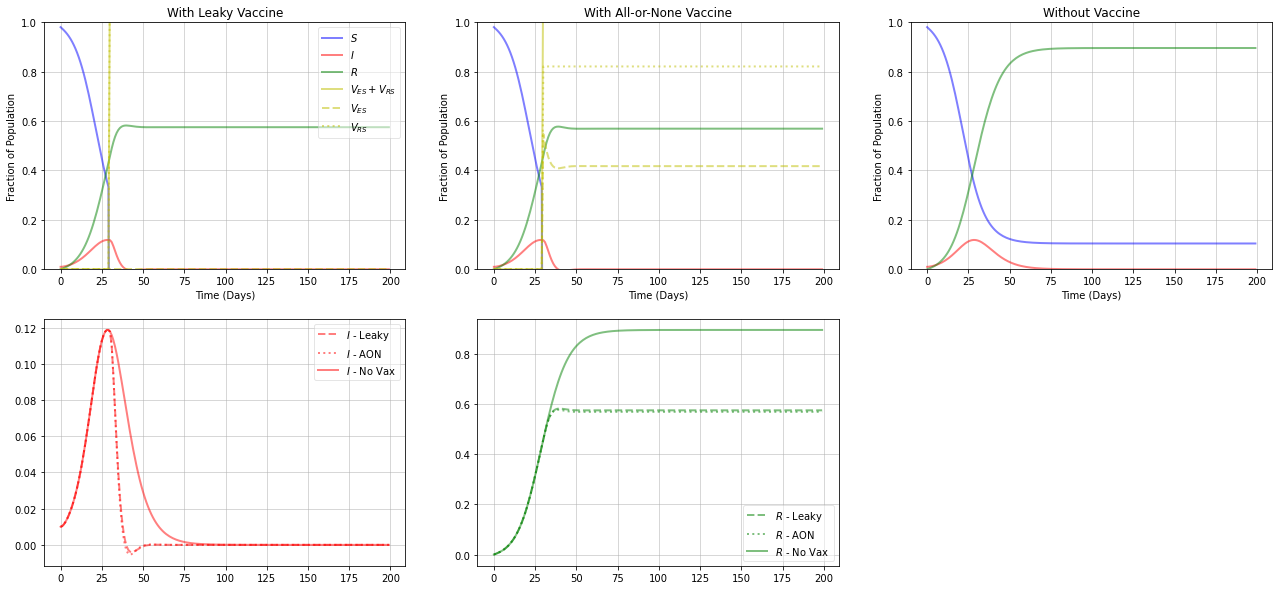

In [28]:
### run model
# set varying parameters
vc = (1 - s0_vax[-1]/R0) / 0.6; vmax = 1 - ((1 - vc) * 0.8)

# leaky
epsL = 0.6; epsA = 1
v_es0_leaky = 0; v_rs0_leaky = vmax
y0_vax_leaky = s0_vax[-1] - vmax, v_es0_leaky, v_rs0_leaky, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_leaky = odeint(modified_seir, y0_vax_leaky, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_leaky, v_es1_leaky, v_rs1_leaky, e1_leaky, i1_leaky, r1_leaky = sim_leaky.T
vtot1_leaky = v_es1_leaky + v_rs1_leaky

s_leaky = np.concatenate((s0_vax[:-1], s1_leaky), axis=None)
e_leaky = np.concatenate((e0_vax[:-1], e1_leaky), axis=None)
i_leaky = np.concatenate((i0_vax[:-1], i1_leaky), axis=None)
r_leaky_post30_slabove = np.concatenate((r0_vax[:-1], r1_leaky), axis=None)
vtot_leaky = np.concatenate((np.zeros(D_vax), vtot1_leaky), axis=None)
v_es_leaky = np.concatenate((np.zeros(D_vax), v_es1_leaky), axis=None)
v_rs_leaky = np.concatenate((np.zeros(D_vax), v_rs1_leaky), axis=None)

# aon
epsL = 1; epsA = 0.6
v_es0_aon = vmax*(1-epsA); v_rs0_aon = vmax*epsA
y0_vax_aon = s0_vax[-1] - vmax, v_es0_aon, v_rs0_aon, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_aon = odeint(modified_seir, y0_vax_aon, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_aon, v_es1_aon, v_rs1_aon, e1_aon, i1_aon, r1_aon = sim_aon.T
vtot1_aon = v_es1_aon + v_rs1_aon

s_aon = np.concatenate((s0_vax[:-1], s1_aon), axis=None)
e_aon = np.concatenate((e0_vax[:-1], e1_aon), axis=None)
i_aon = np.concatenate((i0_vax[:-1], i1_aon), axis=None)
r_aon_post30_slabove = np.concatenate((r0_vax[:-1], r1_aon), axis=None)
vtot_aon = np.concatenate((np.zeros(D_vax), vtot1_aon), axis=None)
v_es_aon = np.concatenate((np.zeros(D_vax), v_es1_aon), axis=None)
v_rs_aon = np.concatenate((np.zeros(D_vax), v_rs1_aon), axis=None)

### plot figure
fig = plt.figure(facecolor='w', figsize=(22,10))

ax1 = fig.add_subplot(231, axisbelow=True)
ax1.plot(t, s_leaky, 'b', alpha=0.5, lw=2, label='$S$')
ax1.plot(t, i_leaky, 'r', alpha=0.5, lw=2, label='$I$')
ax1.plot(t, r_leaky_post30_slabove, 'g', alpha=0.5, lw=2, label='$R$')
ax1.plot(t, vtot_leaky, 'y', alpha=0.5, lw=2, label='$V_{ES} + V_{RS}$')
ax1.plot(t, v_es_leaky, 'y--', alpha=0.5, lw=2, label='$V_{ES}$')
ax1.plot(t, v_rs_leaky, 'y:', alpha=0.5, lw=2, label='$V_{RS}$')
ax1.set_title("With Leaky Vaccine")
ax1.set_ylim(0, 1)
ax1.set_ylabel("Fraction of Population")
ax1.set_xlabel('Time (Days)')
ax1.grid(linewidth=0.5)
legend = ax1.legend(loc='upper right'); legend.get_frame().set_alpha(0.5)

ax2 = fig.add_subplot(232, axisbelow=True)
ax2.plot(t, s_aon, 'b', alpha=0.5, lw=2)
ax2.plot(t, i_aon, 'r', alpha=0.5, lw=2)
ax2.plot(t, r_aon_post30_slabove, 'g', alpha=0.5, lw=2)
ax2.plot(t, vtot_aon, 'y', alpha=0.5, lw=2)
ax2.plot(t, v_es_aon, 'y--', alpha=0.5, lw=2)
ax2.plot(t, v_rs_aon, 'y:', alpha=0.5, lw=2)
ax2.set_title("With All-or-None Vaccine")
ax2.set_ylim(0, 1)
ax2.set_ylabel("Fraction of Population")
ax2.set_xlabel('Time (Days)')
ax2.grid(linewidth=0.5)

ax3 = fig.add_subplot(233, axisbelow=True)
ax3.plot(t, s, 'b', alpha=0.5, lw=2)
ax3.plot(t, i, 'r', alpha=0.5, lw=2)
ax3.plot(t, r, 'g', alpha=0.5, lw=2)
ax3.set_title('Without Vaccine')
ax3.set_ylabel('Fraction of Population')
ax3.set_xlabel('Time (Days)')
ax3.set_ylim(0, 1)
ax3.grid(linewidth=0.5)

ax4 = fig.add_subplot(234, axisbelow=True)
ax4.plot(t, i_leaky, 'r--', alpha=0.5, lw=2, label='$I$ - Leaky')
ax4.plot(t, i_aon, 'r:', alpha=0.5, lw=2, label= '$I$ - AON')
ax4.plot(t, i, 'r', alpha=0.5, lw=2, label='$I$ - No Vax')
ax4.grid(linewidth=0.5)
legend = ax4.legend(); legend.get_frame().set_alpha(0.5)

ax5 = fig.add_subplot(235, axisbelow=True)
ax5.plot(t, r_leaky_post30_slabove, 'g--', alpha=0.5, lw=2, label='$R$ - Leaky')
ax5.plot(t, r_aon_post30_slabove, 'g:', alpha=0.5, lw=2, label='$R$ - AON')
ax5.plot(t, r, 'g', alpha=0.5, lw=2, label='$R$ - No Vax')
ax5.grid(linewidth=0.5)
legend = ax5.legend(); legend.get_frame().set_alpha(0.5)

#plt.savefig('seir_example', bbox_inches='tight')

## 30 Days Post-transmission Vaccination, Above $V_c$

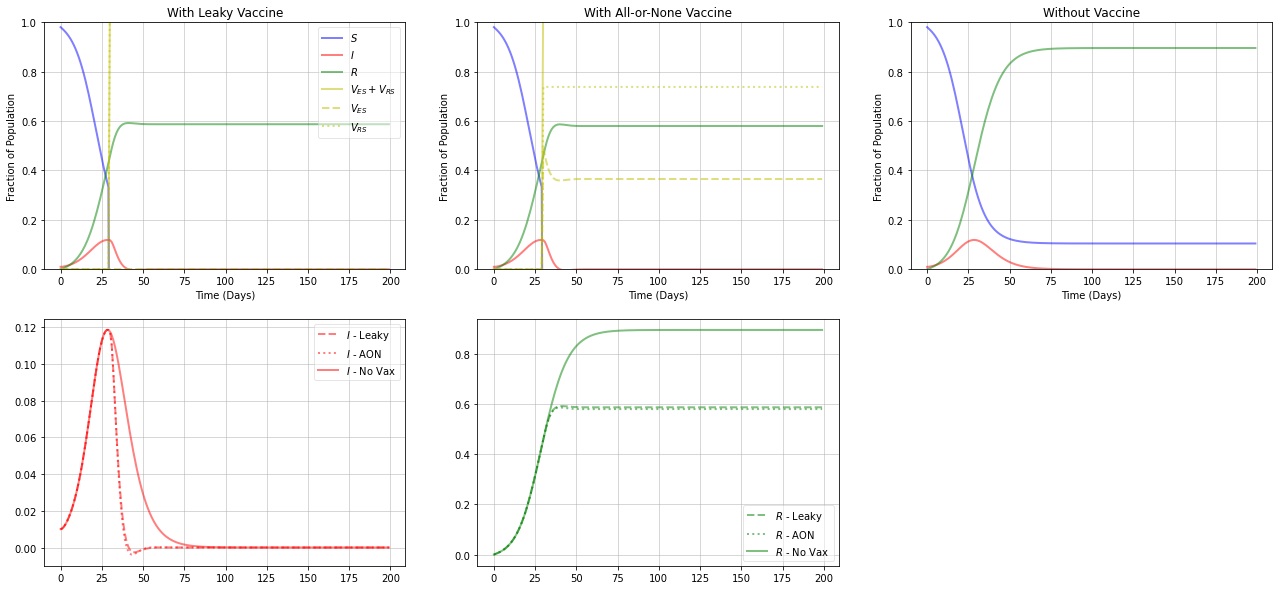

In [29]:
### run model
# set varying parameters
vc = (1 - s0_vax[-1]/R0) / 0.6; vmax = 1 - ((1 - vc) * 0.5)

# leaky
epsL = 0.6; epsA = 1
v_es0_leaky = 0; v_rs0_leaky = vmax
y0_vax_leaky = s0_vax[-1] - vmax, v_es0_leaky, v_rs0_leaky, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_leaky = odeint(modified_seir, y0_vax_leaky, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_leaky, v_es1_leaky, v_rs1_leaky, e1_leaky, i1_leaky, r1_leaky = sim_leaky.T
vtot1_leaky = v_es1_leaky + v_rs1_leaky

s_leaky = np.concatenate((s0_vax[:-1], s1_leaky), axis=None)
e_leaky = np.concatenate((e0_vax[:-1], e1_leaky), axis=None)
i_leaky = np.concatenate((i0_vax[:-1], i1_leaky), axis=None)
r_leaky_post30_above = np.concatenate((r0_vax[:-1], r1_leaky), axis=None)
vtot_leaky = np.concatenate((np.zeros(D_vax), vtot1_leaky), axis=None)
v_es_leaky = np.concatenate((np.zeros(D_vax), v_es1_leaky), axis=None)
v_rs_leaky = np.concatenate((np.zeros(D_vax), v_rs1_leaky), axis=None)

# aon
epsL = 1; epsA = 0.6
v_es0_aon = vmax*(1-epsA); v_rs0_aon = vmax*epsA
y0_vax_aon = s0_vax[-1] - vmax, v_es0_aon, v_rs0_aon, e0_vax[-1], i0_vax[-1], r0_vax[-1]
sim_aon = odeint(modified_seir, y0_vax_aon, t_aftvax, args=(beta, sigma, gamma, f, epsL, epsA, vmax))
s1_aon, v_es1_aon, v_rs1_aon, e1_aon, i1_aon, r1_aon = sim_aon.T
vtot1_aon = v_es1_aon + v_rs1_aon

s_aon = np.concatenate((s0_vax[:-1], s1_aon), axis=None)
e_aon = np.concatenate((e0_vax[:-1], e1_aon), axis=None)
i_aon = np.concatenate((i0_vax[:-1], i1_aon), axis=None)
r_aon_post30_above = np.concatenate((r0_vax[:-1], r1_aon), axis=None)
vtot_aon = np.concatenate((np.zeros(D_vax), vtot1_aon), axis=None)
v_es_aon = np.concatenate((np.zeros(D_vax), v_es1_aon), axis=None)
v_rs_aon = np.concatenate((np.zeros(D_vax), v_rs1_aon), axis=None)

### plot figure
fig = plt.figure(facecolor='w', figsize=(22,10))

ax1 = fig.add_subplot(231, axisbelow=True)
ax1.plot(t, s_leaky, 'b', alpha=0.5, lw=2, label='$S$')
ax1.plot(t, i_leaky, 'r', alpha=0.5, lw=2, label='$I$')
ax1.plot(t, r_leaky_post30_above, 'g', alpha=0.5, lw=2, label='$R$')
ax1.plot(t, vtot_leaky, 'y', alpha=0.5, lw=2, label='$V_{ES} + V_{RS}$')
ax1.plot(t, v_es_leaky, 'y--', alpha=0.5, lw=2, label='$V_{ES}$')
ax1.plot(t, v_rs_leaky, 'y:', alpha=0.5, lw=2, label='$V_{RS}$')
ax1.set_title("With Leaky Vaccine")
ax1.set_ylim(0, 1)
ax1.set_ylabel("Fraction of Population")
ax1.set_xlabel('Time (Days)')
ax1.grid(linewidth=0.5)
legend = ax1.legend(loc='upper right'); legend.get_frame().set_alpha(0.5)

ax2 = fig.add_subplot(232, axisbelow=True)
ax2.plot(t, s_aon, 'b', alpha=0.5, lw=2)
ax2.plot(t, i_aon, 'r', alpha=0.5, lw=2)
ax2.plot(t, r_aon_post30_above, 'g', alpha=0.5, lw=2)
ax2.plot(t, vtot_aon, 'y', alpha=0.5, lw=2)
ax2.plot(t, v_es_aon, 'y--', alpha=0.5, lw=2)
ax2.plot(t, v_rs_aon, 'y:', alpha=0.5, lw=2)
ax2.set_title("With All-or-None Vaccine")
ax2.set_ylim(0, 1)
ax2.set_ylabel("Fraction of Population")
ax2.set_xlabel('Time (Days)')
ax2.grid(linewidth=0.5)

ax3 = fig.add_subplot(233, axisbelow=True)
ax3.plot(t, s, 'b', alpha=0.5, lw=2)
ax3.plot(t, i, 'r', alpha=0.5, lw=2)
ax3.plot(t, r, 'g', alpha=0.5, lw=2)
ax3.set_title('Without Vaccine')
ax3.set_ylabel('Fraction of Population')
ax3.set_xlabel('Time (Days)')
ax3.set_ylim(0, 1)
ax3.grid(linewidth=0.5)

ax4 = fig.add_subplot(234, axisbelow=True)
ax4.plot(t, i_leaky, 'r--', alpha=0.5, lw=2, label='$I$ - Leaky')
ax4.plot(t, i_aon, 'r:', alpha=0.5, lw=2, label= '$I$ - AON')
ax4.plot(t, i, 'r', alpha=0.5, lw=2, label='$I$ - No Vax')
ax4.grid(linewidth=0.5)
legend = ax4.legend(); legend.get_frame().set_alpha(0.5)

ax5 = fig.add_subplot(235, axisbelow=True)
ax5.plot(t, r_leaky_post30_above, 'g--', alpha=0.5, lw=2, label='$R$ - Leaky')
ax5.plot(t, r_aon_post30_above, 'g:', alpha=0.5, lw=2, label='$R$ - AON')
ax5.plot(t, r, 'g', alpha=0.5, lw=2, label='$R$ - No Vax')
ax5.grid(linewidth=0.5)
legend = ax5.legend(); legend.get_frame().set_alpha(0.5)

#plt.savefig('seir_example', bbox_inches='tight')

## Summary

To compare the differences more effectively, below is a figure that follows the dynamics of just the recovered population over time for each regime.

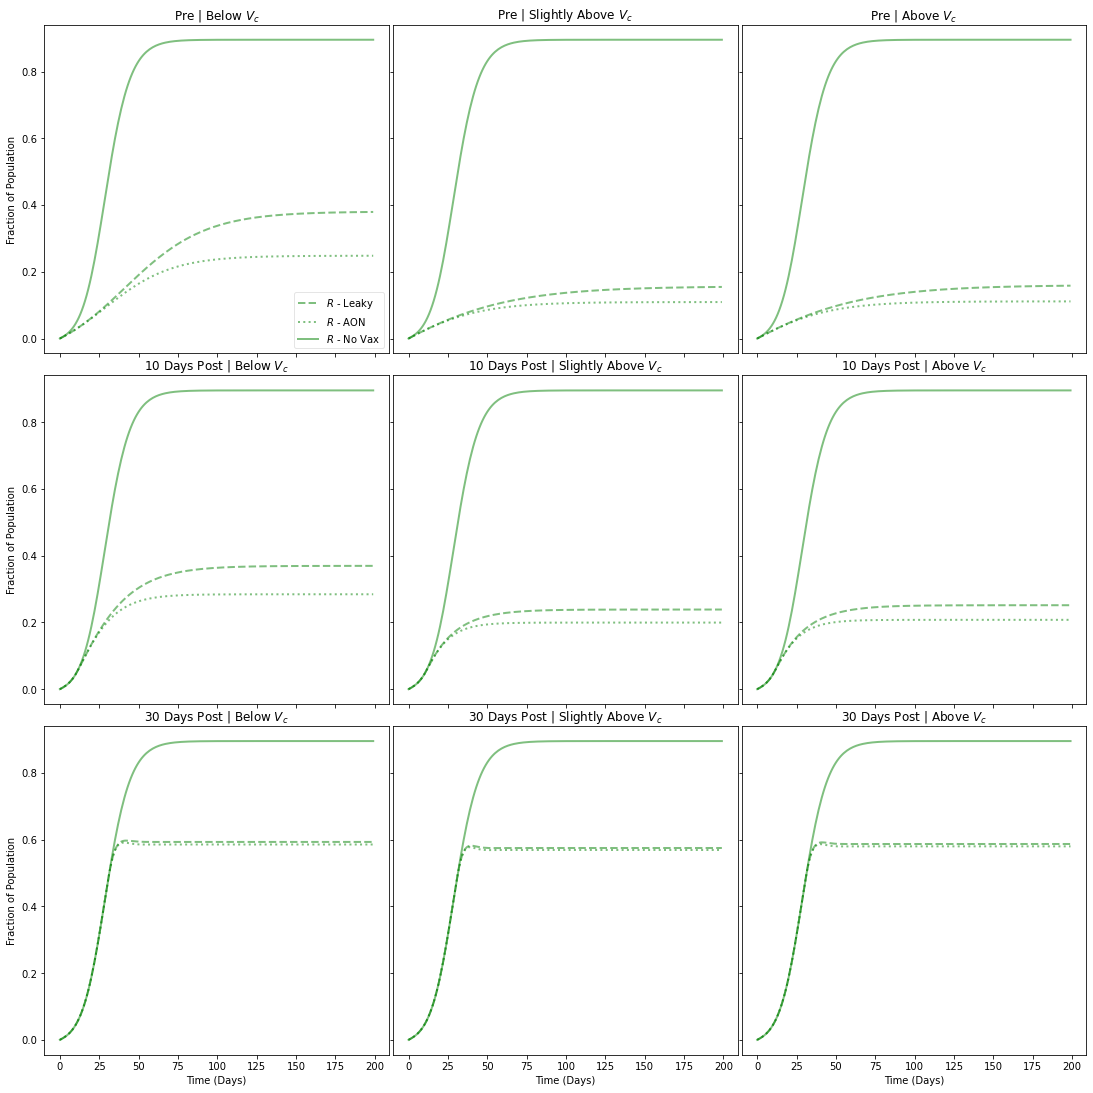

In [30]:
fig, axes = plt.subplots(3,3, facecolor='w', figsize=(15,15), sharex=True, sharey=True, gridspec_kw=dict(width_ratios=[1,1,1]))
#norm = plt.Normalize(np.min(np.log(pre_plot_diff_below+1)), np.max(np.log(pre_plot_diff_below+1)))

# Pre-transmission 
axes[0,0].plot(t, r_leaky_pre_below, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[0,0].plot(t, r_aon_pre_below, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[0,0].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[0,0].set_title('Pre | Below $V_c$')
axes[0,0].set_ylabel('Fraction of Population')
legend = axes[0,0].legend(); legend.get_frame().set_alpha(0.5)

axes[0,1].plot(t, r_leaky_pre_slabove, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[0,1].plot(t, r_aon_pre_slabove, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[0,1].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[0,1].set_title('Pre | Slightly Above $V_c$')

#ax3 = fig.add_subplot(133)
axes[0,2].plot(t, r_leaky_pre_above, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[0,2].plot(t, r_aon_pre_above, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[0,2].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[0,2].set_title('Pre | Above $V_c$')

# 10 days post-transmission
axes[1,0].plot(t, r_leaky_post10_below, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[1,0].plot(t, r_aon_post10_below, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[1,0].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[1,0].set_title('10 Days Post | Below $V_c$')
axes[1,0].set_ylabel('Fraction of Population')

axes[1,1].plot(t, r_leaky_post10_slabove, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[1,1].plot(t, r_aon_post10_slabove, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[1,1].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[1,1].set_title('10 Days Post | Slightly Above $V_c$')

axes[1,2].plot(t, r_leaky_post10_above, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[1,2].plot(t, r_aon_post10_above, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[1,2].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[1,2].set_title('10 Days Post | Above $V_c$')

# 30 days post-transmission
axes[2,0].plot(t, r_leaky_post30_below, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[2,0].plot(t, r_aon_post30_below, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[2,0].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[2,0].set_title('30 Days Post | Below $V_c$')
axes[2,0].set_ylabel('Fraction of Population')
axes[2,0].set_xlabel('Time (Days)')

axes[2,1].plot(t, r_leaky_post30_slabove, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[2,1].plot(t, r_aon_post30_slabove, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[2,1].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[2,1].set_title('30 Days Post | Slightly Above $V_c$')
axes[2,1].set_xlabel('Time (Days)')

axes[2,2].plot(t, r_leaky_post30_above, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[2,2].plot(t, r_aon_post30_above, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[2,2].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[2,2].set_title('30 Days Post | Above $V_c$')
axes[2,2].set_xlabel('Time (Days)')

fig.tight_layout(pad=0.05)
#cb = fig.colorbar(mappable=proj, ax=axes, fraction=0.02, shrink=0.5)
#cb.ax.set_yticklabels(np.round(np.exp(np.linspace(0.0, 4.2, 8))))
#plt.savefig('VE vs R0 2D Contour Plot', bbox_inches='tight')
plt.show()